<a href="https://colab.research.google.com/github/Trang19/INSE6220/blob/main/Tutorial3pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()


**Upload files into Colaboratory**

In [2]:
#uploaded = files.upload()

In [3]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Trang19/INSE6220/main/cancer_patient_datasets_3.1.csv', index_col=0)
##!pip install xlrd
##df = pd.read_excel('cancer_patient_datasets_3.1.xls')
print(df.head(25))

       AU  GR  SK  CP  CB
index                    
D1      4   3   3   2   4
D2      1   4   2   2   3
D3      5   5   2   4   8
D4      7   6   7   7   8
D5      8   7   8   7   9
D6      5   5   2   4   8
D7      4   3   3   2   4
D8      1   2   1   3   1
D9      5   6   6   6   5
D10     3   4   2   4   4
D11     7   7   7   7   7
D12     8   7   7   7   7
D13     5   5   6   6   6
D14     7   6   7   7   8
D15     1   3   2   4   2
D16     6   6   8   5   5
D17     1   4   2   2   3
D18     7   6   7   7   8
D19     7   7   7   7   7
D20     4   5   5   6   5
D21     8   6   8   9   6
D22     5   5   2   4   8
D23     8   7   8   7   9
D24     7   7   7   7   7
D25     7   7   7   7   7


In [4]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

In [5]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, D1 to D25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AU      25 non-null     float64
 1   GR      25 non-null     float64
 2   SK      25 non-null     float64
 3   CP      25 non-null     float64
 4   CB      25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


**Observations and variables**

In [6]:
observations = list(df.index)
variables = list(df.columns)

**Data Visualisation**

<Axes: >

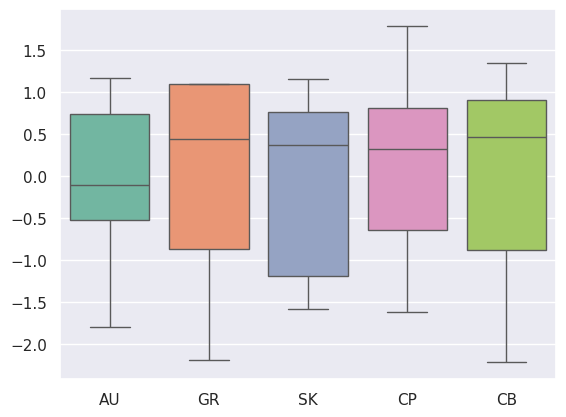

In [7]:
sns.boxplot(data=df, orient="v", palette="Set2")

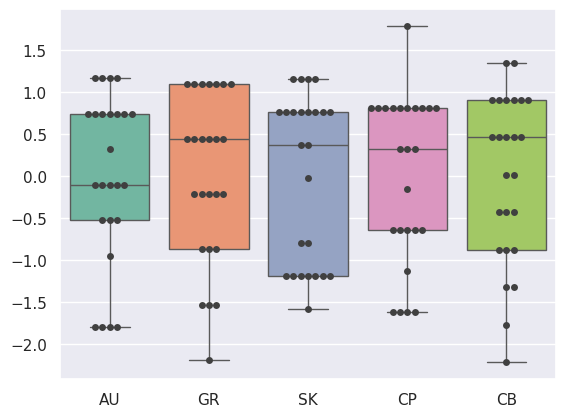

In [8]:
##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25")

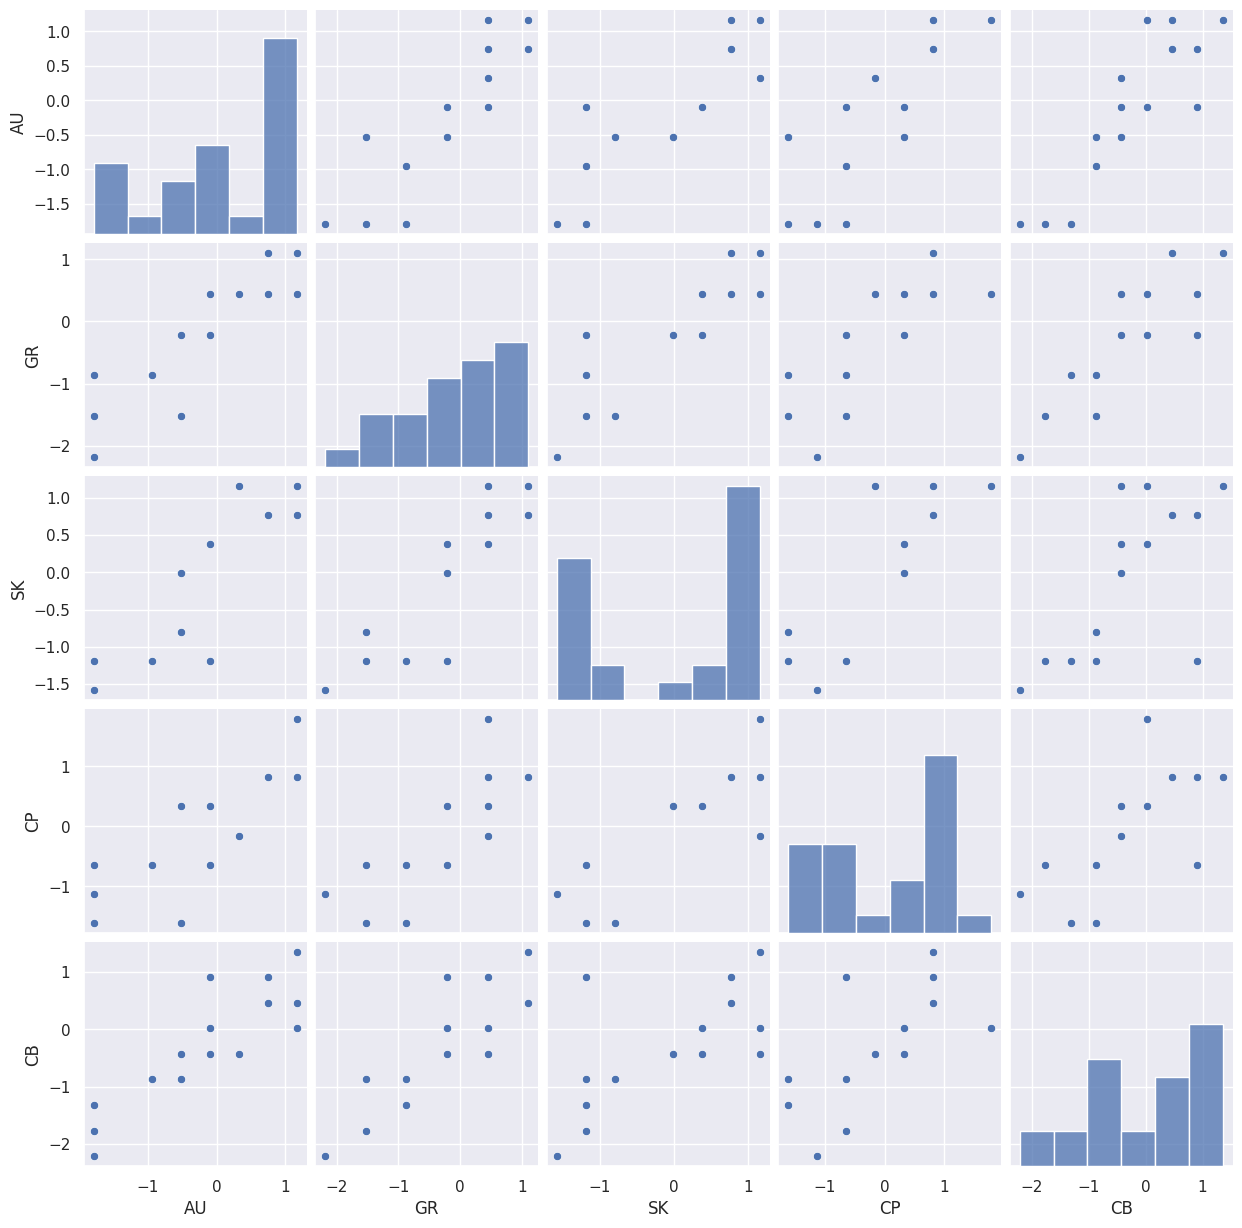

In [9]:
#pairplot
sns.pairplot(df)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

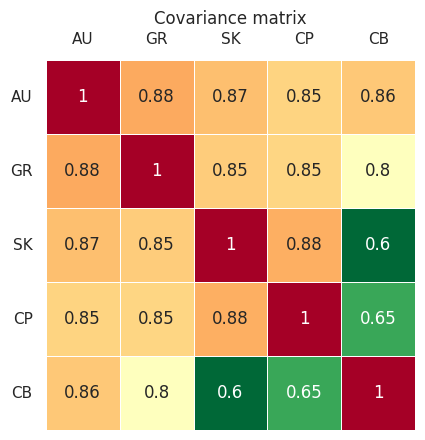

In [10]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

**Principal component analysis**

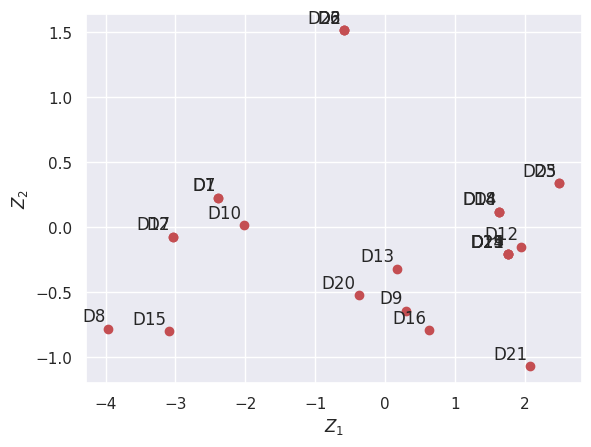

In [11]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

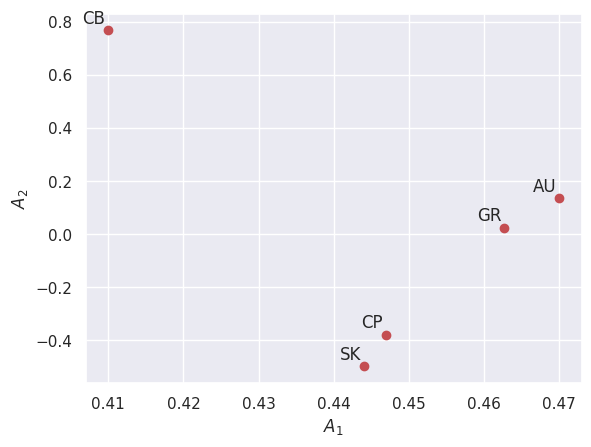

In [12]:
A = pca.components_.T
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


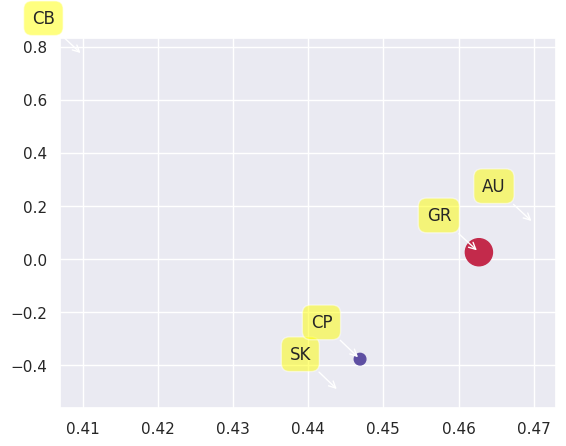

In [13]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

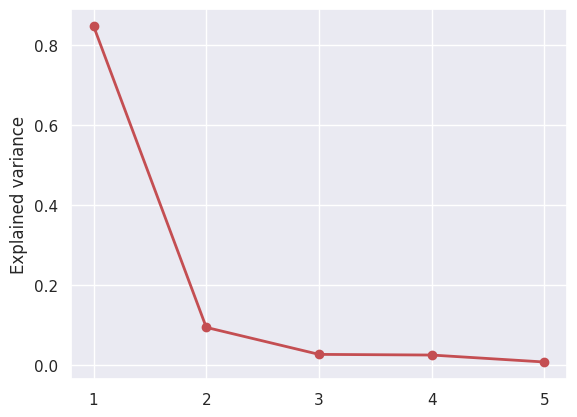

In [14]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

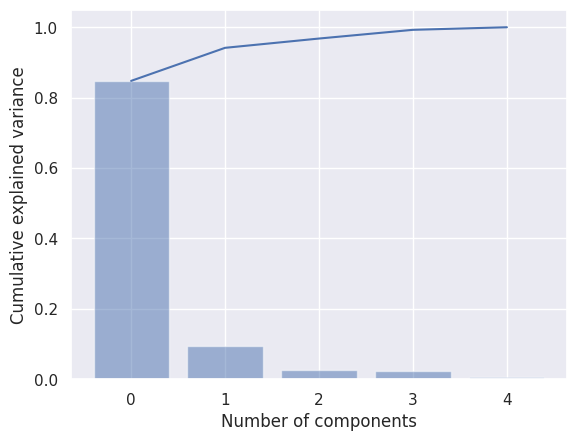

In [15]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

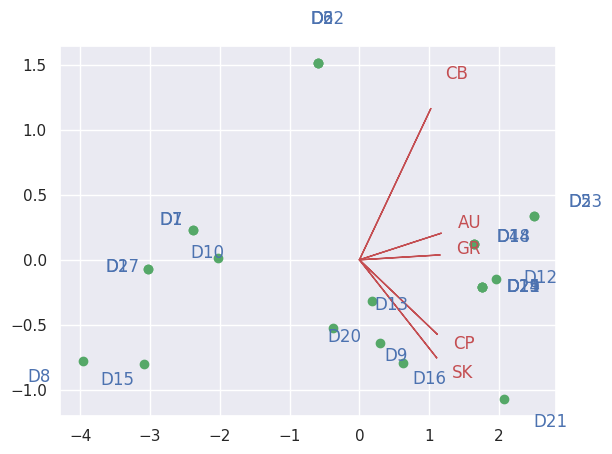

In [16]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal components**

Text(0.5, 1.0, 'Principal components')

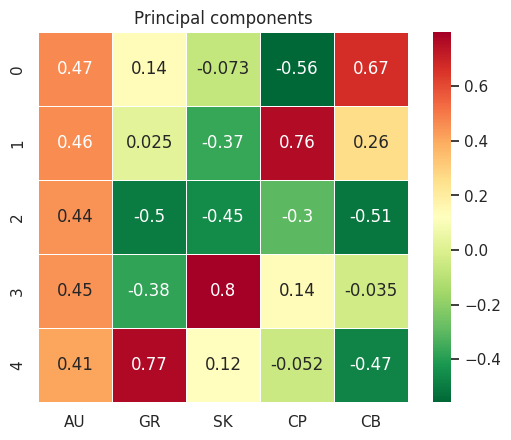

In [17]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')